# Building a Convolutional Neural Network for Fashion MNIST

Our goal will be to train a convolutional neural network on the Fashion MNIST dataset. The Fashion MNIST dataset was
created out of an effort to replace MNIST as a go-to benchmarking dataset for CV algos, so I, lacking in experience with convolutional neural networks, decided to tackle implementing and training a model against it. This is just a documentation of the process of doing so for fun. Perhaps it will be useful to someone else. (I have ignored some of the deprecation warnings from tensorflow since this is just a personal program, and not intended for professional use.)

## Preparing the data

Luckily, Keras already has the dataset ready to download and use easily. No data manipulation of our own is needed :). We start off by importing some needed things. We also normalize our images to have values in the range of [0,1].

In [1]:
import tensorflow as tf
from tensorflow.contrib.layers import conv2d
from tensorflow.contrib.layers import flatten
from tensorflow.contrib.layers import softmax
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test_scalar_labels) = tf.keras.datasets.fashion_mnist.load_data()
num_classes = 10

# normalize the images
x_train = (1/255)*x_train
x_test = (1/255)*x_test

c:\users\alex\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


We also prepare our labels as one-hot vectors instead of scalars as they were originally represented. Simply picking the label'th row from an identity matrix with num_classes rows makes this easy.

In [2]:
y_train = np.array([np.identity(num_classes)[label] for label in y_train])
y_test = np.array([np.identity(num_classes)[label] for label in y_test_scalar_labels])

Some of the images from the dataset can be seen below

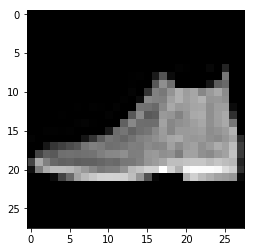

In [3]:
plt.imshow(x_test[0], cmap='gray')
plt.show()

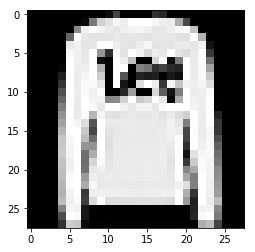

In [4]:
plt.imshow(x_test[1], cmap='gray')
plt.show()

Some placeholders must be created next! We keep a vector of scalar label values so we can use them to easily compute accuracy later.

In [5]:
x = tf.placeholder(dtype=tf.float32, shape=(None, 28, 28))
y = tf.placeholder(dtype=tf.float32, shape=(None, 10))
y_scalars = tf.placeholder(dtype=tf.float32, shape=(None))

## The Convolutional Layer

Next, we define elements for our one and only convolutional layer in the network. We will have 20 filters, each of size 7x7. 

In [6]:
conv1_filter_count = 20
conv1_filter_size = 7
conv1_layer = conv2d(inputs=tf.expand_dims(x, 3), num_outputs=conv1_filter_count,
                    kernel_size=[conv1_filter_size, conv1_filter_size], padding='SAME',
                    stride=2)

The output of this convolutional layer will be a rectangular tensor. We will flatten it so we can feed it to the fully connected layer on the end of our model.

In [7]:
flattened = flatten(conv1_layer)

## The Fully Connected Layer

We must then initialize our weight matrix. We will use Xavier initialization, an advanced and optimal form of weight initialization. The definition of the matrix multiplication that transforms the filters into our prediction vectors follows.

In [8]:
fc1_weights = tf.get_variable(name='fc1_weights', shape=[flattened.shape[1], num_classes], initializer=tf.contrib.layers.xavier_initializer())
fc1_layer = tf.matmul(flattened, fc1_weights)

## Loss and Optimization

In order to train our model, we must apply an optimizer to a differentiable error function. We will compute the cross entropy losses, sum them up, and square them. We will use batch gradient descent with some momentum for our purposes.

In [9]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=y, logits=fc1_layer))
optimizer = tf.train.MomentumOptimizer(learning_rate=0.2, momentum=0.9).minimize(loss)

Also, we will compute the number of correct predictions that we can use later to get an accuracy percentage, which is alot nicer to interpret than our loss function value.

In [10]:
accuracy = tf.reduce_sum(tf.cast(tf.equal(tf.argmax(fc1_layer, axis=1), tf.cast(y_scalars, tf.int64)), tf.int64))

## Setting the model loose on the training data

Now we can train for a while and see how well the model does!

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(204):
      sess.run(optimizer, feed_dict={x:x_train, y:y_train, y_scalars:[]})
      print("epoch " + str(i) + " accuracy: " + str(100*sess.run(accuracy, feed_dict={x:x_test, y:y_test, y_scalars:y_test_scalar_labels}) / len(y_test)) + "%")

epoch 0 accuracy: 21.84%
epoch 1 accuracy: 31.18%
epoch 2 accuracy: 55.91%
epoch 3 accuracy: 30.13%
epoch 4 accuracy: 47.36%
epoch 5 accuracy: 35.62%
epoch 6 accuracy: 33.67%
epoch 7 accuracy: 37.79%
epoch 8 accuracy: 48.47%
epoch 9 accuracy: 60.49%
epoch 10 accuracy: 55.92%
epoch 11 accuracy: 64.87%
epoch 12 accuracy: 65.84%
epoch 13 accuracy: 68.85%
epoch 14 accuracy: 68.29%
epoch 15 accuracy: 70.54%
epoch 16 accuracy: 69.37%
epoch 17 accuracy: 71.48%
epoch 18 accuracy: 73.23%
epoch 19 accuracy: 72.59%
epoch 20 accuracy: 74.99%
epoch 21 accuracy: 75.01%
epoch 22 accuracy: 75.62%
epoch 23 accuracy: 77.46%
epoch 24 accuracy: 77.3%
epoch 25 accuracy: 78.0%
epoch 26 accuracy: 78.61%
epoch 27 accuracy: 79.08%
epoch 28 accuracy: 79.54%
epoch 29 accuracy: 79.83%
epoch 30 accuracy: 79.68%
epoch 31 accuracy: 80.78%
epoch 32 accuracy: 80.58%
epoch 33 accuracy: 80.93%
epoch 34 accuracy: 81.38%
epoch 35 accuracy: 81.68%
epoch 36 accuracy: 81.98%
epoch 37 accuracy: 82.26%
epoch 38 accuracy: 82.1%

After a total of 204 epochs, we obtain an accuracy of ~88%. Not bad, but perhaps we can get it up in the 90's by adding some other elements to the model later.